### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [85]:
data = pd.read_csv('data/coupons.csv')

In [89]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [87]:
# Use .info to look for NaN values
print(data.info(), end='\n\n')

# We see that 
# the 'car' column has 108/12684 non-null values,
# the 'Bar' column has 12577/12684 non-null values
# the 'CoffeeHouse' column has 12467/12684 non-null values
# the 'CarryAway' column has 12533/12684 non-null values
# the 'RestaurantLessThan20' has 12554/12684 non-null values
# the 'Restaurant20To50' has 12495/12684 non-null values.
# So we examine further to see what the non-null values are for each category

for x in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(data[x].value_counts(dropna=False), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [88]:
# Now that we know that the non-null values look like, we can begin to make some assessments.
# The most urgent is the 'car' column. 
# Since we see that the null values for the car category basically take up the whole set,
# we decide to keep all null values as otherwise we would only look at 108/12684 entries.
# Given that there is a category, 'do not drive' that already accounts for non-drivers, we will assume that these null values
# correspond to drivers of unknown vehicles as otherwise they'd be listed as 'do not drive'.
# Thus, these values will be renamed 'unknown vehicle'
data_modified = data.copy()
data_modified['car'] = data_modified['car'].replace(np.NaN, 'unknown vehicle')

# Looking at the remaining subcategories available for 'car',
# "Scooter and motorcycle", "Mazda5", "do not drive", "crossover", and "Car that is too old to install Onstar :D",
# We decide that since the question explicitly considers drivers, we will only drop rows where car is listed as 'do not drive'.
data_modified = data_modified.query('car != "do not drive"')

# We now can consider the remaining columns:  'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'.
# As we have seen above, none of these categories have large proportions of null values. 
# Moreover, the default values that these null values could correspond to cannot be inferred as easily as the 'car' category.
# We examine what proportion of the data would be lost if we were to omit the rows which have null values in these columns:
columns = 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
null_query = data_modified.query(' or '.join(map(lambda x: f'{x}.isnull()', columns)), engine='python')
print(null_query.shape, data_modified.shape, null_query.shape[0] / data_modified.shape[0], sep='\t', end='\n\n')

# We find that if we were to omit such datapoints then we would lose 605/12662 or 4.78% of the remaining entries. 
# Given that our sample size would still retain over 95% of the data, 
# we decide to go through with the cut and drop those remaining null values.
data_modified = data_modified.query(' and '.join(map(lambda x: f'{x}.notnull()', columns)), engine='python')

for x in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(data_modified[x].value_counts(dropna=False), end='\n\n')
    
print(data_modified.shape[0], sep='\t', end='\n\n')

(605, 26)	(12662, 26)	0.04778076133312273

unknown vehicle                             11971
Scooter and motorcycle                         22
Mazda5                                         22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

never    4934
less1    3394
1~3      2370
4~8      1054
gt8       305
Name: Bar, dtype: int64

less1    3276
1~3      3159
never    2852
4~8      1659
gt8      1111
Name: CoffeeHouse, dtype: int64

1~3      4480
4~8      4083
less1    1790
gt8      1573
never     131
Name: CarryAway, dtype: int64

1~3      5141
4~8      3450
less1    2005
gt8      1285
never     176
Name: RestaurantLessThan20, dtype: int64

less1    5859
1~3      3180
never    2070
4~8       684
gt8       264
Name: Restaurant20To50, dtype: int64

12057



4. What proportion of the total observations chose to accept the coupon? 



In [91]:
# Was interested to see how much if at all these proportions changed in the two datasets.
# Evidently, they did not change much.
print('Original data: ', data.query('Y == 1').shape[0] / data.shape[0], sep='')
print('Reduced data: ', data_modified.query('Y == 1').shape[0] / data_modified.shape[0], sep='')

Original data: 0.5684326710816777
Reduced data: 0.5695446628514556


5. Use a bar plot to visualize the `coupon` column.

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


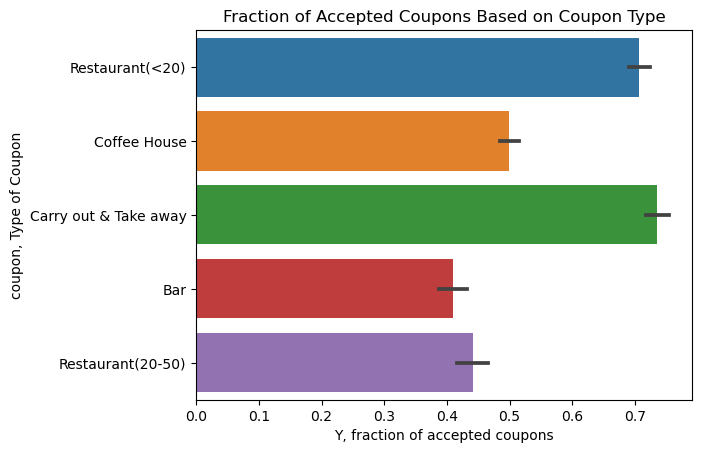

In [243]:
print(data['coupon'].value_counts())
fig = sns.barplot(data=data, x='Y', y='coupon')
plt.title('Fraction of Accepted Coupons Based on Coupon Type')
plt.xlabel('Y, fraction of accepted coupons')
plt.ylabel('coupon, Type of Coupon')

plt.show()

6. Use a histogram to visualize the temperature column.

80    6528
55    3840
30    2316
Name: temperature, dtype: int64


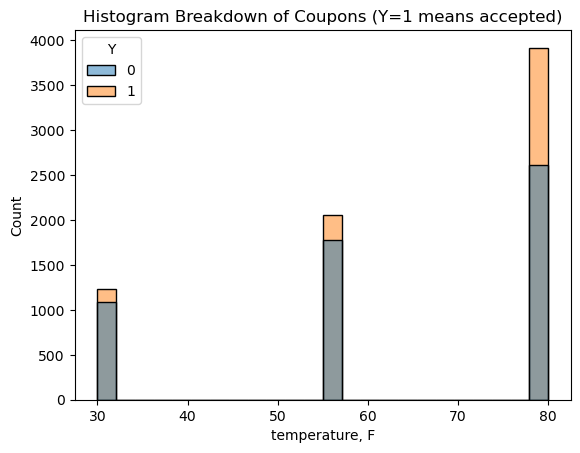

In [248]:
print(data['temperature'].value_counts())
fig = sns.histplot(data=data, x='temperature', hue='Y')

plt.title('Histogram Breakdown of Coupons (Y=1 means accepted)')
plt.xlabel('temperature, F')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [111]:
bar_data = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [250]:
print(f'The proportion of bar coupons accepted is {bar_data.query("Y == 1").shape[0] / bar_data.shape[0]}.')

The proportion of bar coupons accepted is 0.41001487357461575.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [253]:
fewerthan3 = ["never", "less1", "1~3"]
morethan3 = ["4~8", "gt8"]

ratio_fewerthan3 = bar_data.query('Y == 1 and Bar == @fewerthan3').shape[0] / bar_data.query('Bar == @fewerthan3').shape[0]
ratio_morethan3 = bar_data.query('Y == 1 and Bar == @morethan3').shape[0] / bar_data.query('Bar == @morethan3').shape[0]
print(f'The rate of those who accepted the coupon and went to a bar 3 or fewer times a month is {ratio_fewerthan3}.')
print(f'The rate of those who accepted the coupon and went to a bar 3 or more times a month is {ratio_morethan3}.')
print('Evidently, the subgroup that goes to the bar more often than 3 times a month is also more likely to accept a bar coupon.')

The rate of those who accepted the coupon and went to a bar 3 or fewer times a month is 0.37061769616026713.
The rate of those who accepted the coupon and went to a bar 3 or more times a month is 0.7688442211055276.
Evidently, the subgroup that goes to the bar more often is also more likely to accept a bar coupon.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [266]:
# Here I was a bit confused. So the first group is clear enough (I hope), but "all others" isn't to me. So what I figured it
# meant was to compare that first group against its complementary group i.e. the drivers that don't go to a bar more than once a 
# month or are under the age of 25.

morethan1 = ['1~3', '4~8', 'gt8']
agemorethan25 = ['26', '31', '50plus', '36', '41', '46']

# The group in question
ratio1 = (bar_data.query('Y == 1 and Bar == @morethan1 and age == @agemorethan25').shape[0] 
          / bar_data.query('Bar == @morethan1 and age == @agemorethan25').shape[0])
print(f'The rate of acceptance for drivers that go to a bar more than once a month and are over the age of 25 is {ratio1}.')

# The complementary group
ratio2 = (bar_data.query('Y == 1 and (Bar != @morethan1 or age != @agemorethan25)').shape[0] 
          / bar_data.query('Bar != @morethan1 or age != @agemorethan25').shape[0])
print('The rate of acceptance for drivers that don\'t go to a bar more than once a month or aren\'t over the age of 25 is ',
      ratio2, '.', sep='')
print('Hence, frequent bar divers over the age of 25 are more likely to accept a bar coupon than infrequent bar divers',
      'or under-25s.')


The rate of acceptance for drivers that go to a bar more than once a month and are over the age of 25 is 0.6952380952380952.
The rate of acceptance for drivers that don't go to a bar more than once a month or aren't over the age of 25 is 0.33500313087038197.
Hence, frequent bar divers over the age of 25 are more likely to accept a bar coupon than infrequent bar divers or under-25s.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [267]:
# Much as before, we first construct the first group and then compare it against its complement.
morethan1 = ['1~3', '4~8', 'gt8']
passengers = ['Friends(s)', 'Partner']
occupations = ['Farming Fishing & Forestry ']

ratio1 = (bar_data.query('Y == 1 and Bar == @morethan1 and passanger == @passengers and occupation != @occupations').shape[0] 
         / bar_data.query('Bar == @morethan1 and passanger == @passengers and occupation != @occupations').shape[0])

ratio2 = (bar_data.query('Y == 1 and (Bar != @morethan1 or passanger != @passengers or occupation == @occupations)').shape[0] 
         / bar_data.query('Bar != @morethan1 or passanger != @passengers or occupation == @occupations').shape[0])

print('The acceptance rate for frequent bar attendees who didn\'t have a passenger kid and had occupations other than ',
      f'farming, fishing, forestry is {ratio1}.', sep='')
print('The acceptance rate for infrequent bar attendees or who had a passenger kid or who had a farming, fishing, forestry',
      f'occupation is {ratio2}.', sep='')
print('As such, the rate for the first group is higher than the rate for its complementary group.')

The acceptance rate for frequent bar attendees who didn't have a passenger kid and had occupations other than farming, fishing, forestry is 0.6.
The acceptance rate for infrequent bar attendees or who had a passenger kid or who had a farming, fishing, forestryoccupation is 0.40267765190525234.
As such, the rate for the first group is higher than the rate for its complementary group.


In [268]:
#print(bar_data.columns, end='\n\n')
#print(bar_data['passanger'].value_counts(), end='\n\n')
#print(bar_data['occupation'].value_counts(), end='\n\n')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [277]:
# This question was also a bit confusing. So I interpreted as look for all the drivers matching the categories described above
# and compare them against their complement. This problem was more complex given then multitude of conditions so it was broken
# down into three query strings labeled as 'first_string', 'second_string', and 'third_string'. These were then concatenated
# into the 'composite', and finally the 'composite' was used to query the dataset. The complement was constructed similarly.

morethan1 = ['1~3', '4~8', 'gt8']
passengers = ['Friends(s)', 'Partner']
widowed = ['Widowed']
first_string = 'Bar == @morethan1 and passanger == @passengers and maritalStatus != @widowed'
first_string_complement = 'Bar != @morethan1 or passanger != @passengers or maritalStatus == @widowed'

ageunder30 = ['21', '26', 'below21']
second_string = 'Bar == @morethan1 and age == @ageunder30'
second_string_complement = 'Bar != @morethan1 or age != @ageunder30'

restaurants = ['4~8', 'gt8']
incomes = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
third_string = 'RestaurantLessThan20 == @restaurants and income == @incomes'
third_string_complement = 'RestaurantLessThan20 != @restaurants or income != @incomes'

composite = ' or '.join([first_string, second_string, third_string])
complement = ' and '.join([first_string_complement, second_string_complement, third_string_complement])

composite_ratio = bar_data.query(f'Y == 1 and ({composite})').shape[0] / bar_data.query(f'{composite}').shape[0]
complement_ratio = bar_data.query(f'Y == 1 and ({complement})').shape[0] / bar_data.query(f'{complement}').shape[0]

print(f'The ratio for the properties described above is {composite_ratio}.')
print(f'The ratio for the complement of the properties described above is {complement_ratio}.')
print('The acceptance rates of the described set is higher than its complement.')

The ratio for the properties described above is 0.5610932475884244.
The ratio for the complement of the properties described above is 0.4083375188347564.
The acceptance rates of the described set is higher than its complement.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### List of observations:
    
The proportion of bar coupons accepted is 0.41001487357461575.

The rate of those who accepted the coupon and went to a bar 3 or fewer times a month is 0.37061769616026713.
The rate of those who accepted the coupon and went to a bar 3 or more times a month is 0.7688442211055276.
Evidently, the subgroup that goes to the bar more often is also more likely to accept a bar coupon.

The rate of acceptance for drivers that go to a bar more than once a month and are over the age of 25 is 0.6952380952380952.
The rate of acceptance for drivers that don't go to a bar more than once a month or aren't over the age of 25 is 0.33500313087038197.
Hence, frequent bar divers over the age of 25 are more likely to accept a bar coupon than infrequent bar divers or under-25s.

The acceptance rate for frequent bar attendees who didn't have a passenger kid and had occupations other than farming, fishing, forestry is 0.6.
The acceptance rate for infrequent bar attendees or who had a passenger kid or who had a farming, fishing, forestryoccupation is 0.40267765190525234.
As such, the rate for the first group is higher than the rate for its complementary group.

The ratio for the properties described above is 0.5610932475884244.
The ratio for the complement of the properties described above is 0.4083375188347564.
The acceptance rates of the described set is higher than its complement. 

#### Hypothesis: 
The acceptance rates for the sets that have drivers that attend to bars at least once a month are all noticeably higher than those of their complements, even for very complex sets like the last one. Hence, we can make the hypothesis that the main factor affecting the acceptance rates is the amount of times per month that a person attends a bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [160]:
# We are gooing to be looking at the coffee subdataset
coffee = data.query('coupon == "Coffee House"')

In [283]:
# Unidimesional groupings

# First we will examine the columns of interest below individually before then mixing and matching them.
# These columns were chosen based on two factors: 
# 1) I wanted to look at how convenience affected taking the coupons (destination, weather, temperature, expiration, direction_same)
# 2) I wanted to see if education and whether the people were students meant they took more or less coupons.

# The process will be straightforward for each category:
# 1) type out the query that defines the subgroup within each column
# 2) use the "query_fraction" function below to give us the ratio of coupon takers within that query subgroup
# 3) print out the ratio and the description of the subgroups using the "print_message" function.

def query_fraction(data, query):
    '''
    Takes a DataFrame object data and a string query and returns the list containing numerator and denominator needed 
    to make the ratio of coupon takers for the queried subgroup within data.
    '''
    return [data.query(f'Y == 1 and ({query})', engine='python').shape[0], data.query(f'{query}', engine='python').shape[0]]

def print_message(message, numbers, end='\n'):
    '''
    Takes a string message plus the list output from query_fraction above and prints out a formatted message.
    '''
    ratio = numbers[0] / numbers[1]
    print(f'{message} {numbers[0]}/{numbers[1]} or {ratio}.', end=end)

# Look at the whole group first
print('Within the coffee house coupon subgroup:')
ratio = coffee.query('Y == 1').shape[0] / coffee.shape[0]
print_message('The ratio of coupon takers among the whole subgroup was', [coffee.query('Y == 1').shape[0], coffee.shape[0]], 
              end='\n\n')

# destination
# Compare the people who had no urgent place to go vs. those to had work or home as a destination.
subgroup = 'destination in ["No Urgent Place"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers among those who had no urgent place to go was', ratio)
subgroup = 'destination in ["Home", "Work"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers among those who were going home or to work was', ratio, end='\n\n')

# weather
# Compare the people who experienced sunny vs. inclement weather
subgroup = 'weather in ["Sunny"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who experienced sunny weather was', ratio)
subgroup = 'weather in ["Snowy", "Rainy"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who experienced inclement weather was', ratio, end='\n\n')

# temperature
# Compare how temperature affects the ratio of coupon-takers
subgroup = 'temperature in [80]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who experienced hot weather was', ratio)
subgroup = 'temperature in [30, 55]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who experienced cold or mild weather was', ratio, end='\n\n')

# expiration
# Compare how prompt or distant expiration affects the ratio of coupon takers
subgroup = 'expiration in ["1d"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers whose coupon expired in one day was', ratio)
subgroup = 'expiration in ["2h"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers whose coupon expired in two hours was', ratio, end='\n\n')

# direction_same
# Compare whether a coffee house being on the way affects the choice
subgroup = 'direction_same in [1]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who received coupons in the same direction of travel was', ratio)
subgroup = 'direction_same in [0]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who received coupons not in the same direction of travel was', ratio, end='\n\n')

# education
# Look at how education affects whether the person takes the coupon or not 
subgroup = ('education in ["Some college - no degree", "Associates degree", "Bachelors degree", \
            "Graduate degree (Masters or Doctorate)"]')
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who completed at least some college was', ratio)
subgroup = 'education in ["High School Graduate", "Some High School"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who did not attend college was', ratio, end='\n\n')

# occupation
# Compare whether students or employed non-retired professionals are more likely to take coupons or not
subgroup = 'occupation in ["Student"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who were students was', ratio)
subgroup = 'occupation not in ["Student, Unemployed, Retired"]'
ratio = query_fraction(coffee, subgroup)
print_message('The ratio of coupon takers who were employed non-retired professionals was', ratio, end='\n\n')

Within the coffee house coupon subgroup:
The ratio of coupon takers among the whole subgroup was 1995/3996 or 0.49924924924924924.

The ratio of coupon takers among those who had no urgent place to go was 1252/2155 or 0.5809744779582366.
The ratio of coupon takers among those who were going home or to work was 743/1841 or 0.4035850081477458.

The ratio of coupon takers who experienced sunny weather was 1746/3467 or 0.5036054225555235.
The ratio of coupon takers who experienced inclement weather was 249/529 or 0.4706994328922495.

The ratio of coupon takers who experienced hot weather was 1272/2401 or 0.5297792586422324.
The ratio of coupon takers who experienced cold or mild weather was 723/1595 or 0.45329153605015676.

The ratio of coupon takers whose coupon expired in one day was 1033/1769 or 0.5839457320520068.
The ratio of coupon takers whose coupon expired in two hours was 962/2227 or 0.4319712617871576.

The ratio of coupon takers who received coupons in the same direction of tra

In [292]:
# Based on the above numbers, I want to further explore a few areas of intersection.

# Is convenience a big factor?
# We define convenience as the set containing members that have 
# sunny weather or hot temperature or long expiry time or coupons along direction of travel
convenience_query_atleast1 = ' or '.join(['direction_same in [1]', 'expiration in ["1d"]', 'temperature in [80]', 
                                          'weather in ["Sunny"]'])
ratio = query_fraction(coffee, convenience_query_atleast1)
print_message('The ratio of coffee house coupon takers who had at least 1 convenient condition or coupon was', ratio)

# Now the complement
convenience_query_atleast1_comp = ' and '.join(['direction_same not in [1]', 'expiration not in ["1d"]', 
                                                'temperature not in [80]', 'weather not in ["Sunny"]'])
ratio = ratio = query_fraction(coffee, convenience_query_atleast1_comp)
print_message('The ratio of the coffee house coupon takers who had no convenient conditions or coupons was', ratio)

# Compare that to the intersection of all the convenient categories
convenience_query_all = ' and '.join(['direction_same in [1]', 'expiration in ["1d"]', 'temperature in [80]', 
                                      'weather in ["Sunny"]'])
ratio = query_fraction(coffee, convenience_query_all)
print_message('The ratio of coffee house coupon takers who had all the convenient conditions or coupons was', ratio, end='\n\n')

# Does convenience affect the choice that students or non-retired professionals make?
# Look at students first.
student_convenience = convenience_query_atleast1 + ' and occupation in ["Student"]'
ratio = query_fraction(coffee, student_convenience)
print_message('The ratio of student coffee house coupon takers who had at least 1 convenient condition or coupon was', ratio)
# Then the complement among the students, i.e. no convenient condition or coupon and student
student_convenience_comp = convenience_query_atleast1_comp + ' and occupation in ["Student"]'
ratio = query_fraction(coffee, student_convenience_comp)
print_message('The ratio of student coffee house coupon takers who had no convenient conditions or coupons was', ratio, 
              end='\n\n')

# Now look at non-retired professionals
professional_convenience = convenience_query_atleast1 + 'and occupation not in ["Student, Unemployed, Retired"]'
ratio = query_fraction(coffee, professional_convenience)
print_message('The ratio of non-retired professional coffee house coupon takers who had at least 1 convenient condition or ' 
              + 'coupon was', ratio)
# Then the complement among the non-retired professionals
professional_convenience_comp = convenience_query_atleast1_comp + 'and occupation not in ["Student, Unemployed, Retired"]'
ratio = query_fraction(coffee, professional_convenience_comp)
print_message('The ratio of non-retired professional coffee house coupon takers who had no convenient conditions or coupons was',
              ratio, end='\n\n')

# How does urgency pair up with convenience?
# The primary set will be the convenient conditions above and destination being "Home" or "Work". 
urgency_convenience = convenience_query_atleast1 + 'and destination in ["Home", "Work"]'
ratio = query_fraction(coffee, urgency_convenience)
print_message('The ratio of coffee house coupon takers who had somewhere to be is', ratio)
# The complement looks at the same convenient conditions and destination being "No Urgent Place"
urgency_convenience_comp = convenience_query_atleast1_comp + 'and destination in ["No Urgent Place"]'
ratio = query_fraction(coffee, urgency_convenience_comp)
print_message('The ratio of coffee house coupon takers who did not have somewhere to be is', ratio)



The ratio of coffee house coupon takers who had at least 1 convenient condition or coupon was 1965/3879 or 0.5065738592420727.
The ratio of the coffee house coupon takers who had no convenient conditions or coupons was 30/117 or 0.2564102564102564.
The ratio of coffee house coupon takers who had all the convenient conditions or coupons was 146/255 or 0.5725490196078431.

The ratio of student coffee house coupon takers who had at least 1 convenient condition or coupon was 1745/3262 or 0.5349478847332925.
The ratio of student coffee house coupon takers who had no convenient conditions or coupons was 4/15 or 0.26666666666666666.

The ratio of non-retired professional coffee house coupon takers who had at least 1 convenient condition or coupon was 1965/3879 or 0.5065738592420727.
The ratio of non-retired professional coffee house coupon takers who had no convenient conditions or coupons was 30/117 or 0.2564102564102564.

The ratio of coffee house coupon takers who had somewhere to be is 18

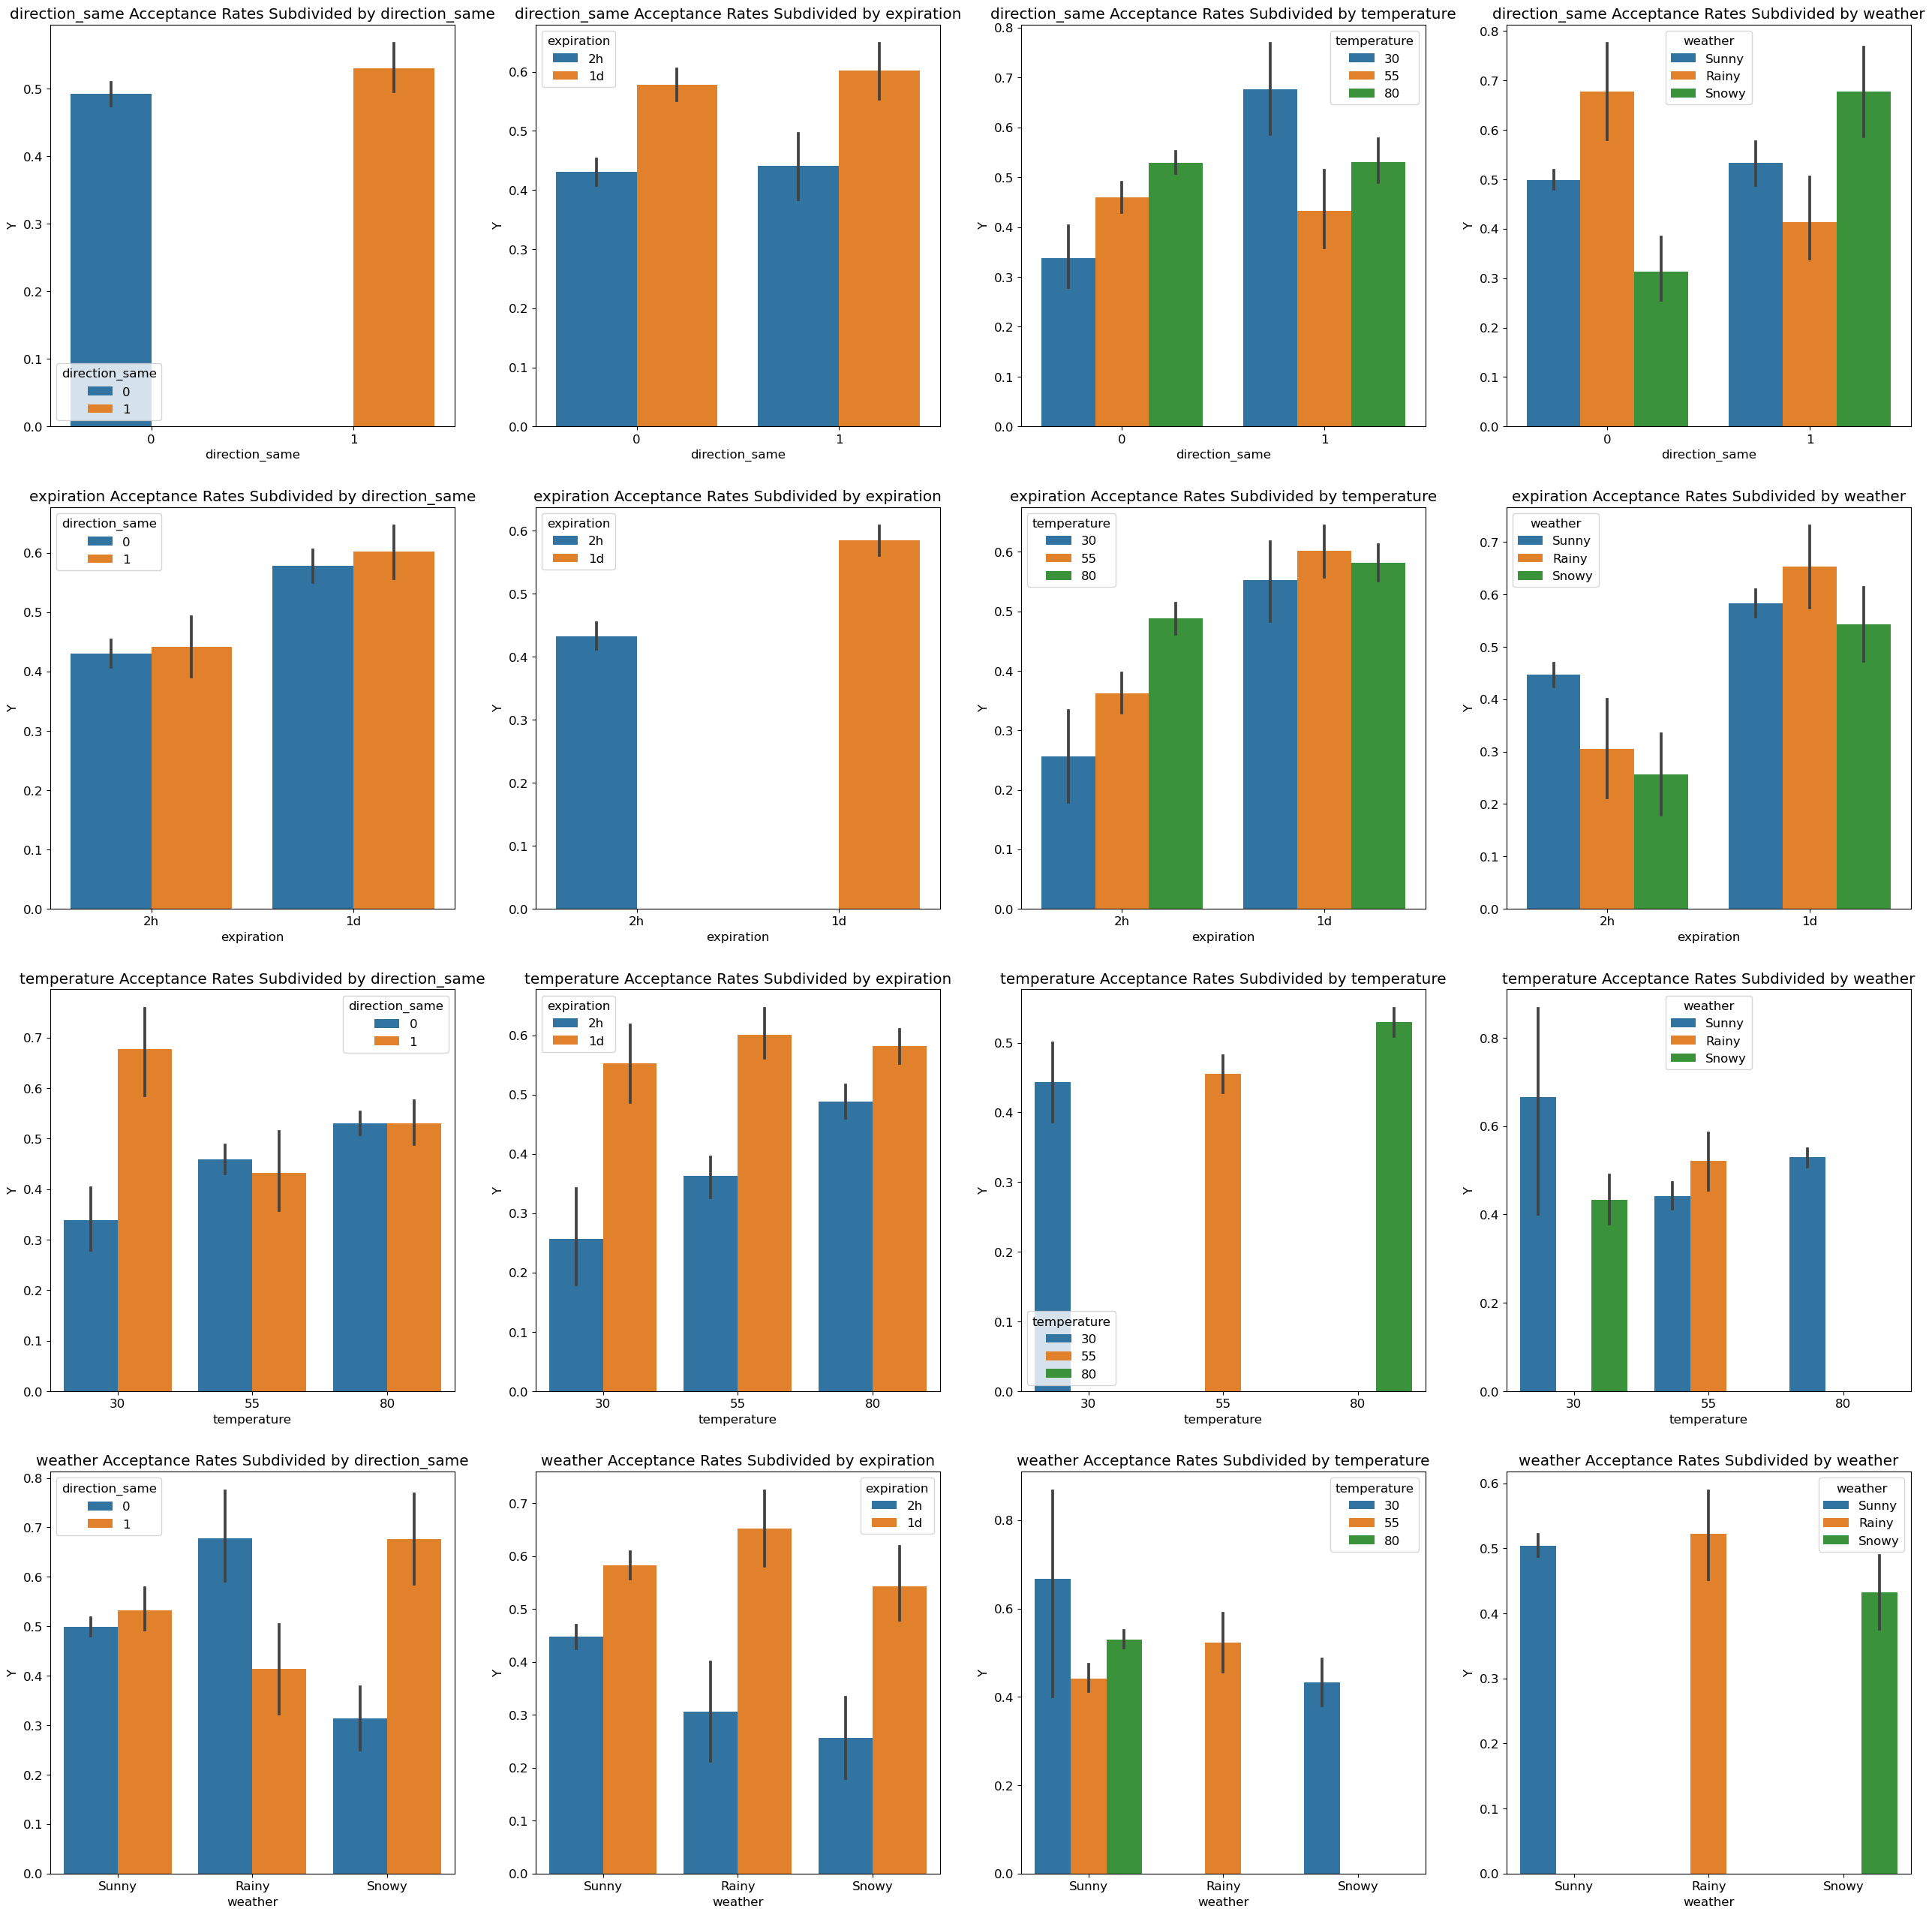

In [303]:
# Next we can take a look at maybe how the convenience variables interact with each other in relation to Coffee House coupons.
# While I know that sns.pairplot exists, I wasn't able to figure out if can create anything but scatter plots between 
# numerical data. So instead this a bit of matplolib and sns together was used to produce them.

# Each of the plots is looking at three variables simultaneously. The x-axes are always supplied by the so-called convenience
# variables "direction_same", "expiration", "temperature", and "weather" while the y-axes are always plotting fractional
# frequency counts. The third variable is another one of the convenience variables and is used as the "hue". The diagonals
# evidently are the base bar graphs one might expect without adding the hue parameter. The point of this particular choice 
# was because the results from the above inquiries left a lot of intrigue. So, I decided to then look systematically at what 
# the relationship between these variables is as maybe there were aspects and relations that I was missing and did not expect. 

# Setting a larger fontsize for these graphs.
font = {'size': 12}
plt.rc('font', **font)

fig, ax = plt.subplots(4, 4, figsize=(32, 32))
convenience_columns = ['direction_same', 'expiration', 'temperature', 'weather']
for i, col1 in enumerate(convenience_columns):
    for j, col2 in enumerate(convenience_columns):
        subfig = sns.barplot(data=coffee, ax=ax[i, j], x=col1, y='Y', hue=col2)
        subfig.set_title(f'{col1} Acceptance Rates Subdivided by {col2}')

        

### List of observations (within the coffee house coupon subgroup):

#### Unidimensional:
The ratio of coupon takers among the whole subgroup was 1995/3996 or 0.49924924924924924.

The ratio of coupon takers among those who had no urgent place to go was 1252/2155 or 0.5809744779582366.
The ratio of coupon takers among those who were going home or to work was 743/1841 or 0.4035850081477458.

The ratio of coupon takers who experienced sunny weather was 1746/3467 or 0.5036054225555235.
The ratio of coupon takers who experienced inclement weather was 249/529 or 0.4706994328922495.

The ratio of coupon takers who experienced hot weather was 1272/2401 or 0.5297792586422324.
The ratio of coupon takers who experienced cold or mild weather was 723/1595 or 0.45329153605015676.

The ratio of coupon takers whose coupon expired in one day was 1033/1769 or 0.5839457320520068.
The ratio of coupon takers whose coupon expired in two hours was 962/2227 or 0.4319712617871576.

The ratio of coupon takers who received coupons in the same direction of travel was 398/750 or 0.5306666666666666.
The ratio of coupon takers who received coupons not in the same direction of travel was 1597/3246 or 0.49199014171287736.

The ratio of coupon takers who completed at least some college was 1827/3689 or 0.4952561669829222.
The ratio of coupon takers who did not attend college was 168/307 or 0.5472312703583062.

The ratio of coupon takers who were students was 312/499 or 0.625250501002004.
The ratio of coupon takers who were employed non-retired professionals was 1995/3996 or 0.49924924924924924.

#### Multidimensional

The ratio of coffee house coupon takers who had at least 1 convenient condition or coupon was 1965/3879 or 0.5065738592420727.
The ratio of the coffee house coupon takers who had no convenient conditions or coupons was 30/117 or 0.2564102564102564.
The ratio of coffee house coupon takers who had all the convenient conditions or coupons was 146/255 or 0.5725490196078431.

The ratio of student coffee house coupon takers who had at least 1 convenient condition or coupon was 1745/3262 or 0.5349478847332925.
The ratio of student coffee house coupon takers who had no convenient conditions or coupons was 4/15 or 0.26666666666666666.

The ratio of non-retired professional coffee house coupon takers who had at least 1 convenient condition or coupon was 1965/3879 or 0.5065738592420727.
The ratio of non-retired professional coffee house coupon takers who had no convenient conditions or coupons was 30/117 or 0.2564102564102564.

The ratio of coffee house coupon takers who had somewhere to be is 1811/3544 or 0.5110045146726863.
The ratio of coffee house coupon takers who had somewhere to be is 15/32 or 0.46875.

#### Graphs
The graphs present an interesting and comprehensive look at the relationships between the different 'Convenience Variables', i.e. direction_same", "expiration", "temperature", and "weather", and how these affect the acceptance rate together.

### Hypothesis

asdf